In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pwd
PATH = '/content/drive/MyDrive/'
PATH_AFTER_MYDRIVE = 'MSC_DATA_SCIENCE/ComputerVision_CW/'
FINAL_PATH = PATH + PATH_AFTER_MYDRIVE
%cd $FINAL_PATH

/content
/content/drive/MyDrive/MSC_DATA_SCIENCE/ComputerVision_CW


In [4]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load



def EmotionRecognition(path2testimages,model_type):
    #Pick one model type :
    # CNN
    # SIFT_MLP
    # HOG_MLP
    # SIFT_SVM
    # HOG_SVM


    test_images  = np.load(path2testimages)
    test_labels = pd.read_csv('labels/list_label_test.txt',delimiter = "\s+",names = ['File','Class'])
    y_test = test_labels['Class'].to_numpy()
    y_test  = y_test-1
    num2emo = ['Suprise','Fear','Disgust','Happiness','Sadness','Anger','Neutral']


    if model_type == 'CNN':
      model = tf.keras.models.load_model('Trained_CNN')
      yhat = model.predict_classes(test_images/255)
      
    
    if model_type=='SIFT_MLP':
      sift_testx,sift_testy = np.load('generated_data/SIFT_DES_testx.npy'),np.load('generated_data/SIFT_DES_testy.npy')
      model = tf.keras.models.load_model('MLP_Sift')
      yhat = model.predict_classes(sift_testx)
      y_test = sift_testy


    if model_type=='HOG_MLP':
      hog_test = np.load('generated_data/HOG_DES_test.npy')
      model = tf.keras.models.load_model('Hog_MLP')      
      yhat = model.predict_classes(hog_test)

    if model_type=='SIFT_SVM':
      sift_testx,sift_testy = np.load('generated_data/SIFT_DES_testx.npy'),np.load('generated_data/SIFT_DES_testy.npy')
      clf = load('svm_sift.joblib') 
      yhat = clf.predict(sift_testx)
      y_test = sift_testy

    if model_type=='HOG_SVM':
      hog_test = np.load('generated_data/HOG_DES_test.npy')
      clf = load('svm_hog.joblib') 
      yhat = clf.predict(hog_test)

    if model_type not in ['CNN','SIFT_MLP','HOG_MLP','SIFT_SVM','HOG_SVM']:
      print('Wrong Model Type, Try another one from:')
      print('CNN','|','SIFT_MLP','|','HOG_MLP','|','SIFT_SVM','|','HOG_SVM')
  

    fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True, sharey=True)
    ax = axes.ravel()

    for ind,i in enumerate(np.random.randint(0,3068,4)):
      ax[ind].imshow(test_images[i])
      ax[ind].set_title(f'Label: {num2emo[y_test[i]]} \n Prediction: {num2emo[yhat[i]]}')
      ax[ind].set_axis_off()
    fig.tight_layout()
    plt.show()

    print(model_type)
    print(f1_score(y_test,yhat,average='weighted'),'F1 Score')
    print(accuracy_score(y_test,yhat),'Test Set Accruacy')  



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


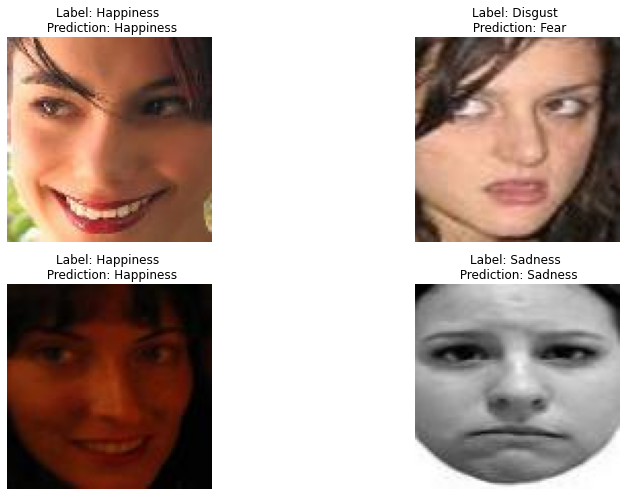

HOG_MLP
0.6574455955324463 F1 Score
0.6659061277705346 Test Set Accruacy


In [5]:
EmotionRecognition(path2testimages = 'generated_data/test_images.npy',model_type='CNN')

In [6]:
#CHANGE TO GPU RUNTIME 

!pip install face_recognition
def run_video():
    
    import tensorflow as tf
    import matplotlib.pyplot as plt
    from skimage.transform import resize 
    import numpy as np
    from IPython.display import clear_output, Image
    import base64
    import cv2
    import face_recognition #https://pypi.org/project/face-recognition/

    #https://stackoverflow.com/questions/58447228/how-to-play-video-on-google-colab-with-opencv
    #https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html


    def arrayShow (imageArray):
        ret, png = cv2.imencode('.png', imageArray)
        encoded = base64.b64encode(png)
        return Image(data=encoded.decode('ascii'))

    num2emo = ['Suprise','Fear','Disgust','Happiness','Sadness','Anger','Neutral']

    cnn_model = tf.keras.models.load_model('Trained_CNN')




    video_capture = cv2.VideoCapture("WIN_20210429_16_38_02_Pro.mp4")


    face_locs = []

    while True:
        
        _, frame = video_capture.read()

      
        frame_RGB = frame[:, :, ::-1]
        #plt.imshow(rgb_frame)
        #plt.show()

      
        face_locs = face_recognition.face_locations(frame_RGB)

        for top, right, bottom, left in face_locs:

            # RED Bounding Box
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

            input = resize(np.array(frame_RGB[top:bottom,left:right,:]),(100,100,3))
            #plt.imshow(input)
            #plt.show()
            input = np.reshape(input,(1,100,100,3))
        

            pred = cnn_model.predict_classes(input)
            #print(cnn_model.predict(input))
          
            



            cv2.putText(frame, num2emo[pred.item()], (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)




        # Display the resulting image
        clear_output(wait=True)
        img = arrayShow(frame)
        display(img)
        # Hit 'q' on the keyboard to quit!
        if cv2.waitKey(1) & 0xFF == ord('q'):
            breakq

    # Release handle to the webcam
    video_capture.release()
    cv2.destroyAllWindows()

     |████████████████████████████████| 100.2MB 76kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=7f9e72eda64103c2ef2742590ccfdb0bcdc7f5d2a1ea353543b2ed46b1229646
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
run_video()